# **AP157 Machine Learning Lab Assignment**
## Module A1: Regression -- Overfitting, Underfitting, and Cross-Validation

_Instructions_: Answer each part of the assignment as completely as you can. Discuss **all** your code and results as clearly and concisely as possible.

_Scoring Criteria_: 50% - *correctness of code*; 50% - *discussion of the code and results*. Maximum score is **100 points** (Parts 1 and 2 are worth 20 and 80 points, respectively).

_Credits_: This assignment is based on Chapter 8.11 of “Statistics, Data Mining, and Machine Learning in Astronomy” (SDMMLA) by Zeljko Ivezic et al.

### Student Information

_Full Name (Last Name, First Name)_: \ DANAC, Nathan Gabriel C.
_Student No._:\ 2021-12517
_Section_: THX-2

### Submission Information

_Date and Time Submitted (most recent upload)_:

**HONOR PLEDGE** I affirm that I have upheld the highest principles of honesty and integrity in my academic work and that this lab assignment is my own work.

**Sign here with your full name: NATHAN GABRIEL C. DANAC**

### Grading Information (c/o Instructor)

TOTAL SCORE: **[]**/100

Score breakdown:
* Part 1 - []/20
* Part 2 - []/80

_Date and Time Scored (MM/DD/YYYY HH:MM AM/PM):_

Import the necessary libraries

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

#### PART 1 - Generate data set *(20 points)*

1. Generate a toy data set with 100 regularly-spaced points and as described by Eq. 8.75-- a simple model where $x$ and $y$ satisfy the following:
$$ 0 \le x_i \le 3 $$
$$ y_i = x_i \sin(x_i) + \epsilon_i $$
where the noise is drawn from a normal distribution $\epsilon_i \sim \rm{N}(0, 0.1)$. *(10 points)*  

2. Plot your toy data set (Refer to Fig. 8.12 for comparison). *(10 points)*


Generate the data set, including noise : with normal distribution

In [ ]:
#Generate 100 linearly-spaced points from 0 to 3
x = np.linspace(0, 3, 100)
#Set random seed
np.random.seed(14)
#Generate normally distributed random noise
err = np.random.normal(scale=0.2, size=100)#Increased maximum noise from 0.1 to 0.2 to make overfit/underfit more obvious
#Generate the data set
y = x * np.sin(x) + err

Displaying the data set

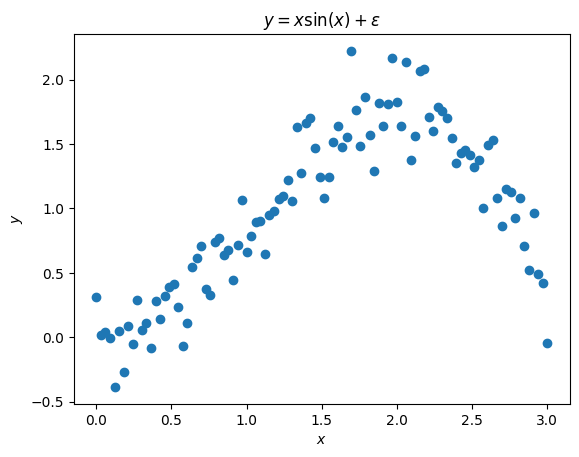

In [ ]:
#Generate the scatter plot
plt.scatter(x, y)
#Formatting
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.title("$y = x\sin(x) + \epsilon$")
#Displaying
plt.show()

PART 2 - Apply cross-validation *(80 points)*

Recreate the top panel of Figure 8.14: rms error vs. polynomial degree for the training set and cross-validation set. To do this, you will perform the ff. steps:

1. Split the data set into training, cross-validation, and test sets with 50%, 25% and 25% ratio. You can use sklearn library's model_selection.train_test_split function [(link)](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html). *(20 pts.)*
2. Get the best-fit curve for polynomial degrees $d=0$ to 14 for the training set. You can use numpy library's polyfit function [(link)](https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html). *(30 pts.)*
3. Get the rms errors for both the training and cross-validation sets (for the best-fit curve from Step 2). *(10 pts.)*
4. Plot rms errors for both the training and cross-validation sets against polynomial degree $d$ (as in Fig. 8.14). *(20 pts.)*


Import the necessary libraries, define the maximum degree for polynomial curve-fitting, and write a function to compute the RMSE

In [ ]:
from sklearn.model_selection import train_test_split
from math import sqrt

#Define the highest degree polynomial to fit
max_degree = 14

#Define a function to compute the RMSE
def rmse(y1, y2):
  err = y1 - y2
  return sqrt((err@err)/len(y1))

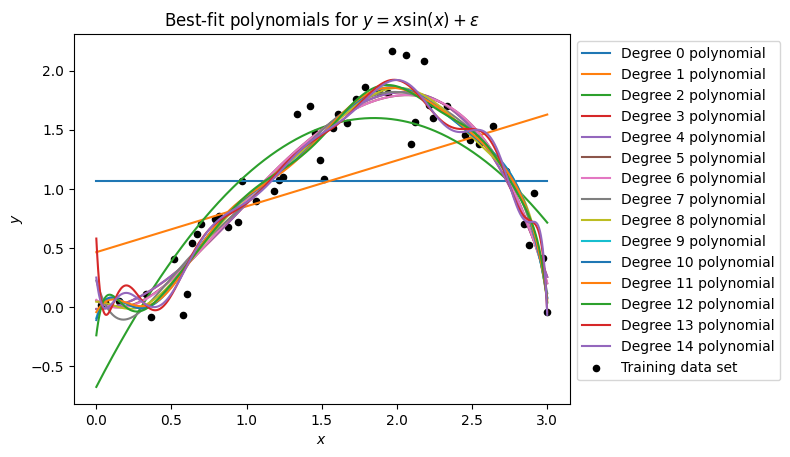

In [ ]:
#Split data set into two sets of 50%, one will be used for training
x_train, x_tcv, y_train, y_tcv, = train_test_split(x, y, test_size=0.5, train_size=0.5, random_state=99)
#Split one 50% into two, basically two sets of 25% each, one for cross-validation and one for testing
x_cv, x_test, y_cv, y_test, = train_test_split(x_tcv, y_tcv, test_size=0.5, train_size=0.5, random_state=67)
#The end result is we have 50% of the data set to be used for training, 25% for cross-validation, and 25% for testing.

#Set up iterables for polynomial degrees
deg = range(max_degree + 1)
#Generate arrays to store the polynomial and rms error
poly = []
rms_train = np.empty(max_degree + 1)
rms_cv = np.empty(max_degree + 1)

for d in deg:
  #Find and store the best-fit polynomial
  c = np.polyfit(x_train, y_train, d)
  p = np.poly1d(c)
  poly.append(c)

  #Plot the best-fit polynomial
  xp = np.linspace(0, 3, 500)
  yp = p(xp)
  plt.plot(xp, yp, label = "Degree " + str(d) + " polynomial")

  #Find and store the rms error from both sets
  rms_train[d] = rmse(y_train, p(x_train))
  rms_cv[d] = rmse(y_cv, p(x_cv))

#Include the training data set as scatter points
plt.scatter(x_train, y_train, s=20, color="black", label="Training data set")
#Formatting
plt.legend(bbox_to_anchor=(1, 1))
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.title("Best-fit polynomials for $y = x\sin(x) + \epsilon$")
#Displaying
plt.show()

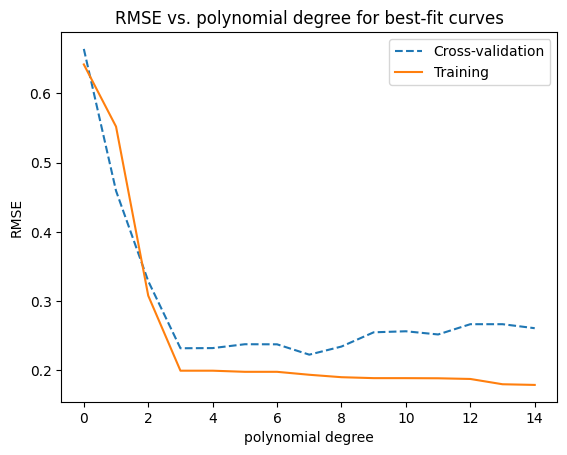

In [ ]:
#Plot the RMSE vs. polynomial degree for the cross-validation and training data sets
plt.plot(deg, rms_cv, "--", label="Cross-validation")
plt.plot(deg, rms_train, "-", label="Training")
#Formatting
plt.legend()
plt.xlabel("polynomial degree")
plt.ylabel("RMSE")
plt.title("RMSE vs. polynomial degree for best-fit curves")
#Displaying
plt.show()

The RMSE for the training set reaches a minimum threshold equal to about ~$0.2$ at around polynomial degree 3. For higher degree polynomials, the RMSE remains at about this level.

The RMSE cannot be much lower than this threshold, since the magnitude of the random noise in our generated data set has a maximum of $0.2$. There are fluctuations pushing it below, but in general, this is the minimum RMSE.

The RMSE for the cross-validation data set follows similar behavior, albeit not reaching the same threshold as the training data set. Since the polynomials were fit against the training set, the RMSE for the cross-validation set is naturally larger.

We can see the RMSE is minimized from polynomial degrees 3 to 7. Afterwards, the RMSE increases. Hence, we can describe the $n$-degree polynomials as

*   $n \leq 2$: underfit
*   $n \geq 8$: overfit

We can take this range of polynomial degrees to be of interest. From the graph above, we can see RMSE is minimized at $n = 7$. However, we can further verify this by using our test data set. We can visualize the polynomials as functions for our test data set, and also measure the RMSE to arrive at a definite conclusion.

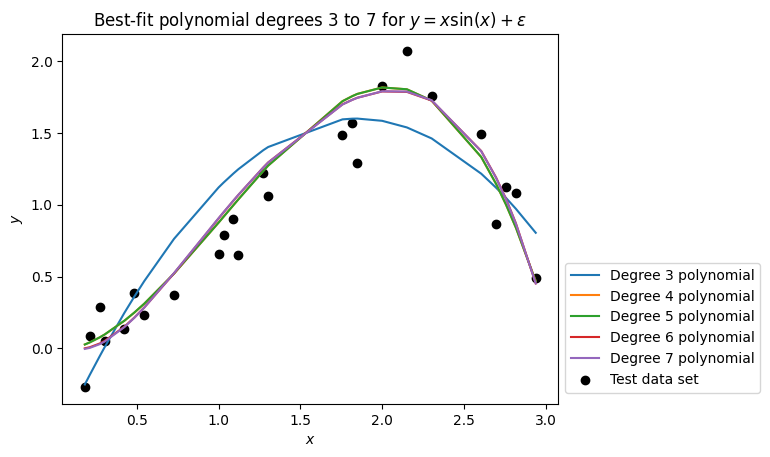

In [ ]:
#Create an array containing the polynomial degrees of interest
bf = [3, 4, 5, 6, 7]
#Create an array to store the RMSE for each polynomial degree
rms = np.empty(5)

for i in bf:
  #Recover each best-fit polynomial from our array
  p = np.poly1d(poly[i - 1])
  #Arrange the x-values of the test data set to be used for plotting
  xp = np.sort(x_test)
  #Obtian the y-values by using each of our best-fit polynomials
  yp = p(xp)
  #Plot each polynomial
  plt.plot(xp, yp, label=("Degree " + str(i) + " polynomial"))
  #Determine and store the RMSE for each degree of polynomial
  rms[i - 3] = rmse(np.sort(y_test), yp)

#Include the test data set as scatter points
plt.scatter(x_test, y_test, color="black", label="Test data set")
#Formatting
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.title("Best-fit polynomial degrees $3$ to $7$ for $y = x\sin(x) + \epsilon$")
plt.legend(bbox_to_anchor=(1, 0.4))
#Displaying
plt.show()

Visually, it appears that the polynomial of degree 3 is the best fit to our test data set. We can verify this numerically by plotting the RMSE.

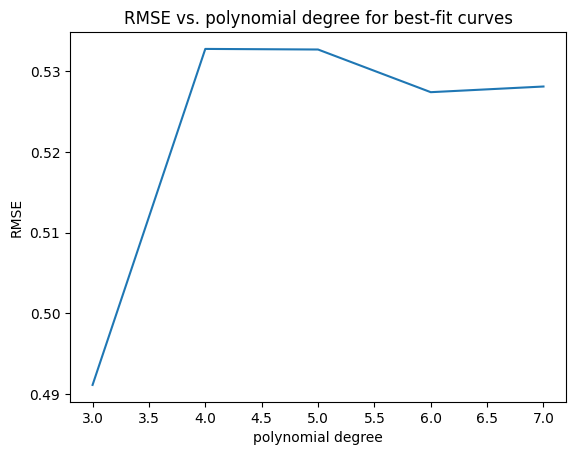

In [ ]:
#Plotting
plt.plot(bf, rms)
#Formatting
plt.xlabel("polynomial degree")
plt.ylabel("RMSE")
plt.title("RMSE vs. polynomial degree for best-fit curves")
#Displaying
plt.show()

We verify that the degree 3 polynomial has the lowest error, and is therefore our best fit.

Given the domain $x\in [0, 3]$ for $y = x\sin(x)$, we can see that there are two points of inflection. The graph begins as concave down, before becoming concave up between $x = 1$ and $x = 1.5$, reaching its maximum just beyond $x = 2$, and then becoming concave down again. In this case, a polynomial of degree 3 makes sense as the best fit, since an $n$-degree polynomial has $n-1$ points of inflection. While higher-degree polynomials can have a visually similar behavior, they would have a tendency to overfit.